In [11]:
import numpy as np
import pandas as pd

In [1]:
from keras import layers
from keras import models

In [2]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-traina

In [3]:
# transform 3D vector to 1D vector
model.add(layers.Flatten())

# classification network
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [12]:
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [13]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
type(train_X)

numpy.ndarray

In [15]:
images = []
images.append(train_X[0])
images.append(train_X[1])
images.append(train_X[2])
images.append(train_X[3])

In [17]:
np.asarray(images).shape

(4, 28, 28)

In [7]:
train_X = train_X.reshape(train_X.shape[0], 28, 28, 1)
train_X = train_X.astype('float32') / 255

test_X = test_X.reshape(test_X.shape[0], 28, 28, 1)
test_X = test_X.astype('float32') / 255

train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

In [9]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy',
            metrics = ['accuracy'])

model.fit(train_X, train_y, epochs = 5, batch_size = 64)

Epoch 1/5
938/938 [==============================] - 31s 30ms/step - loss: 0.1814 - accuracy: 0.94271s - loss:
Epoch 2/5
938/938 [==============================] - 21s 22ms/step - loss: 0.0475 - accuracy: 0.9851
Epoch 3/5
938/938 [==============================] - 21s 22ms/step - loss: 0.0320 - accuracy: 0.9902
Epoch 4/5
938/938 [==============================] - 21s 22ms/step - loss: 0.0246 - accuracy: 0.9926
Epoch 5/5
938/938 [==============================] - 19s 20ms/step - loss: 0.0185 - accuracy: 0.9944


In [11]:
test_loss, test_acc = model.evaluate(test_X, test_y)
test_loss, test_acc

313/313 [==============================] - 4s 11ms/step - loss: 0.0258 - accuracy: 0.9922


(0.02575085125863552, 0.9922000169754028)

In [12]:
y_pred = model.predict(test_X)
y_pred[0]

array([2.6274568e-12, 2.2164116e-10, 5.6450250e-10, 1.4554650e-09,
       1.9888040e-13, 2.4251214e-11, 1.9313188e-15, 1.0000000e+00,
       2.2060280e-10, 1.1274432e-09], dtype=float32)

In [15]:
y_pred = [np.argmax(i) for i in y_pred]
y_pred[0]

7

In [20]:
ind = []

for i in range(len(y_pred)):
    if np.argmax(test_y[i]) != y_pred[i]:
        ind.append(i)

In [21]:
import matplotlib.pyplot as plt

Predicted:  5
Real:  9


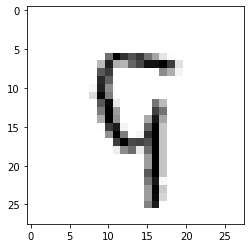

Predicted:  9
Real:  8


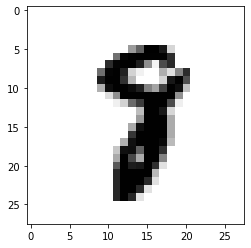

Predicted:  5
Real:  3


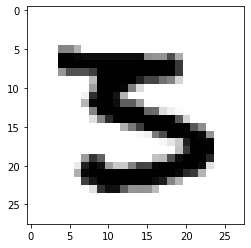

Predicted:  2
Real:  8


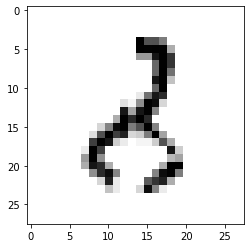

Predicted:  8
Real:  9


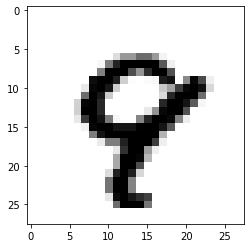

Predicted:  9
Real:  8


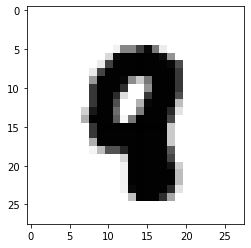

Predicted:  5
Real:  6


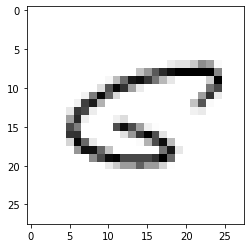

Predicted:  6
Real:  5


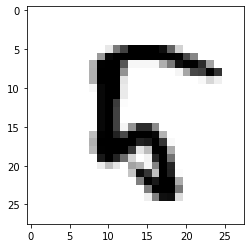

Predicted:  7
Real:  3


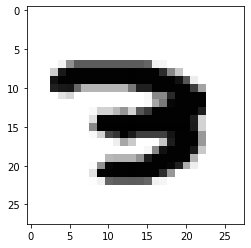

Predicted:  2
Real:  7


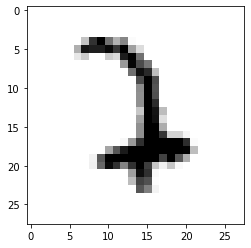

Predicted:  4
Real:  9


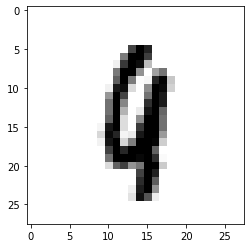

Predicted:  5
Real:  9


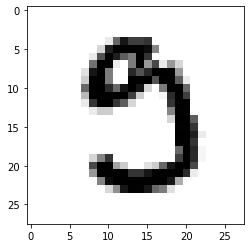

Predicted:  1
Real:  7


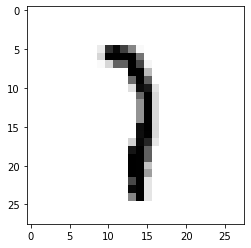

Predicted:  7
Real:  5


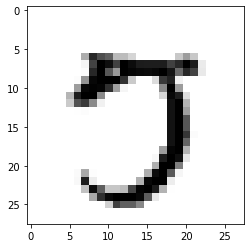

Predicted:  2
Real:  8


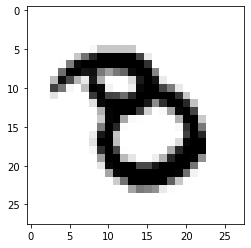

Predicted:  2
Real:  8


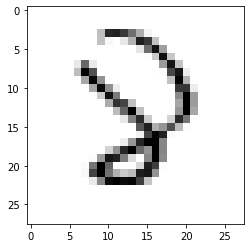

Predicted:  3
Real:  5


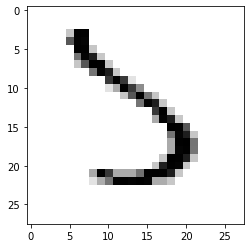

Predicted:  7
Real:  8


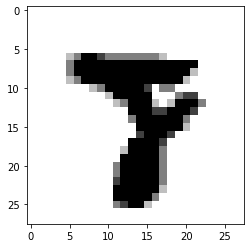

Predicted:  6
Real:  0


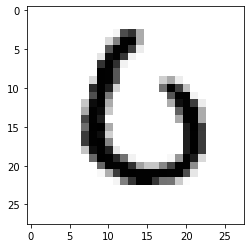

Predicted:  1
Real:  5


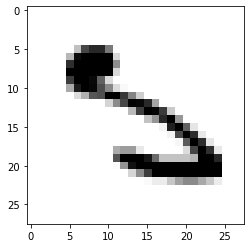

Predicted:  7
Real:  2


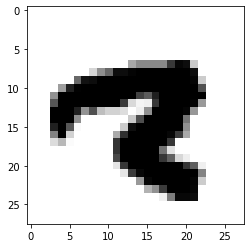

Predicted:  4
Real:  9


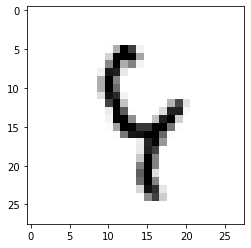

Predicted:  2
Real:  8


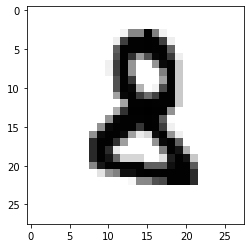

Predicted:  2
Real:  1


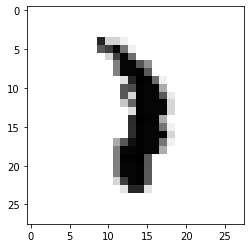

Predicted:  3
Real:  5


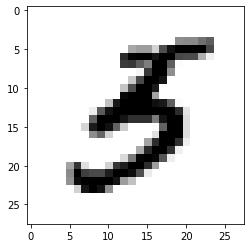

Predicted:  6
Real:  5


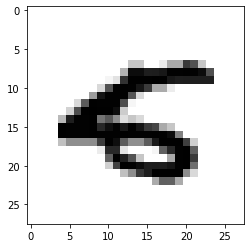

Predicted:  0
Real:  7


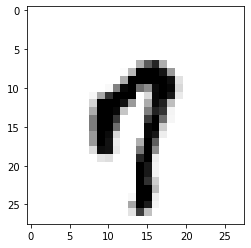

Predicted:  2
Real:  9


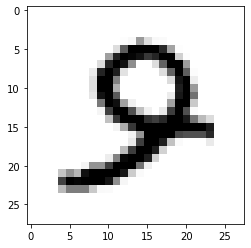

Predicted:  9
Real:  4


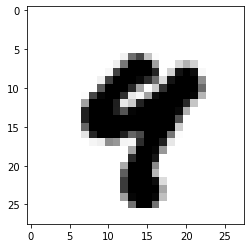

Predicted:  1
Real:  6


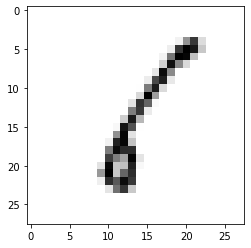

Predicted:  6
Real:  9


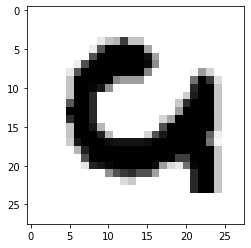

Predicted:  2
Real:  0


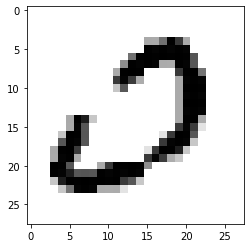

Predicted:  3
Real:  5


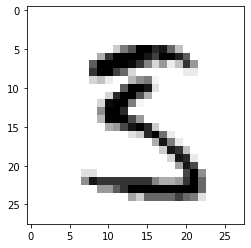

Predicted:  1
Real:  6


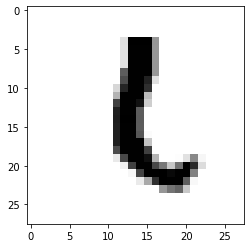

Predicted:  0
Real:  8


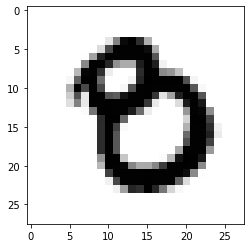

Predicted:  2
Real:  3


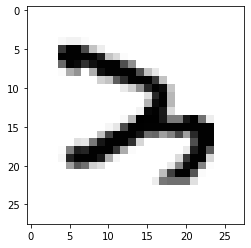

Predicted:  7
Real:  9


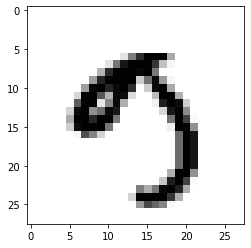

Predicted:  5
Real:  3


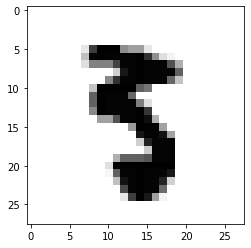

Predicted:  3
Real:  5


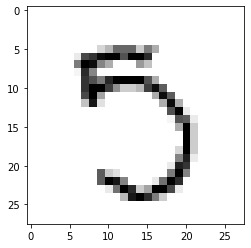

Predicted:  9
Real:  7


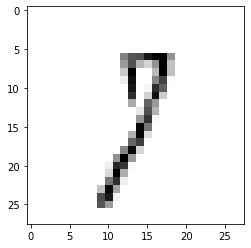

Predicted:  0
Real:  6


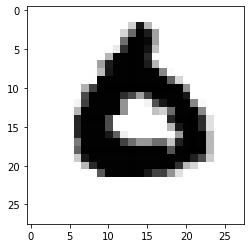

Predicted:  1
Real:  3


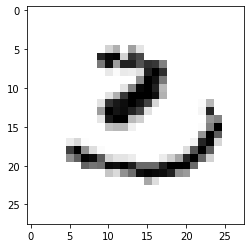

Predicted:  4
Real:  6


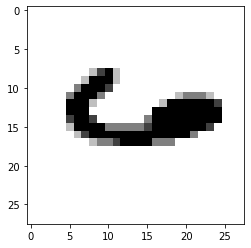

Predicted:  0
Real:  5


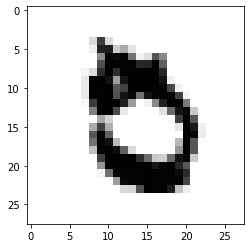

Predicted:  0
Real:  8


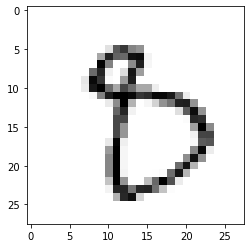

Predicted:  7
Real:  0


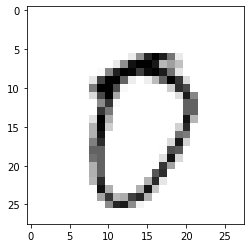

Predicted:  2
Real:  7


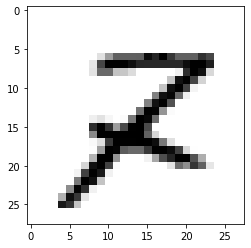

Predicted:  8
Real:  5


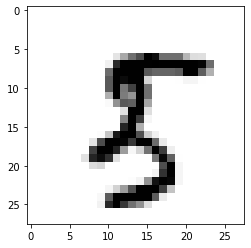

Predicted:  2
Real:  5


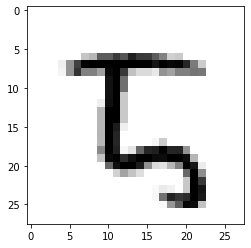

Predicted:  8
Real:  5


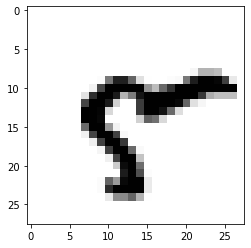

Predicted:  4
Real:  9


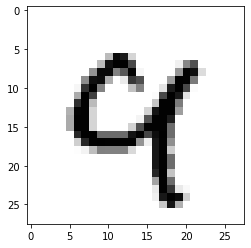

Predicted:  3
Real:  8


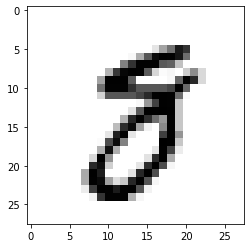

Predicted:  4
Real:  9


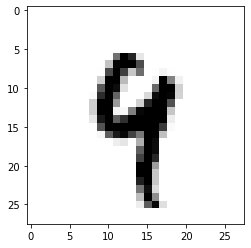

Predicted:  8
Real:  9


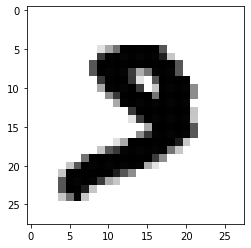

Predicted:  7
Real:  8


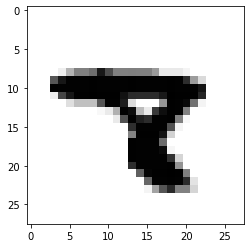

Predicted:  8
Real:  6


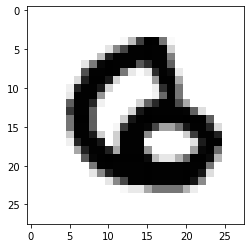

Predicted:  5
Real:  3


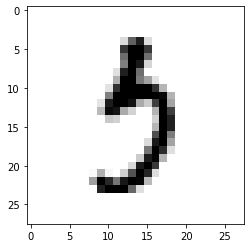

Predicted:  8
Real:  9


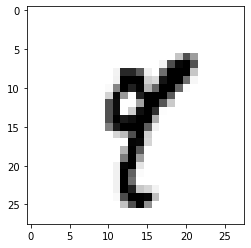

Predicted:  0
Real:  8


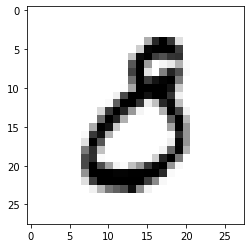

Predicted:  4
Real:  9


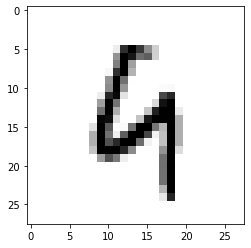

Predicted:  9
Real:  4


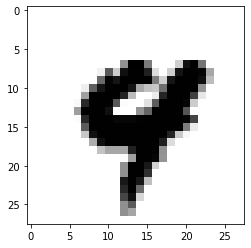

Predicted:  4
Real:  6


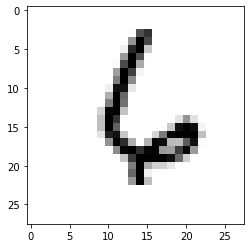

Predicted:  4
Real:  6


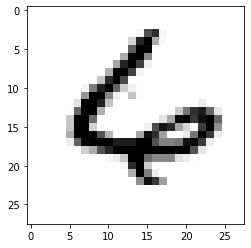

Predicted:  3
Real:  5


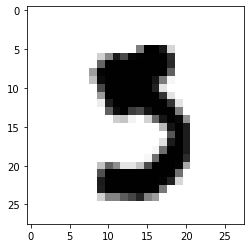

Predicted:  8
Real:  3


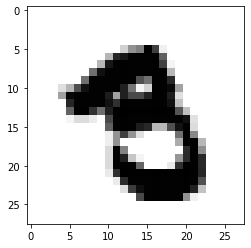

Predicted:  9
Real:  5


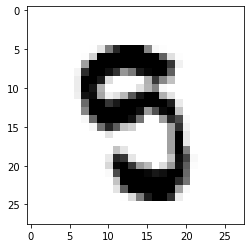

Predicted:  7
Real:  9


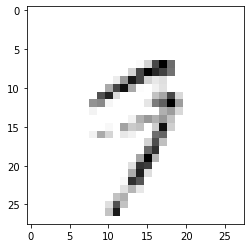

Predicted:  1
Real:  7


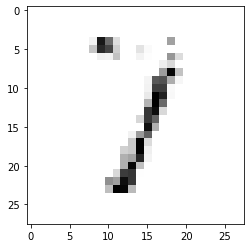

Predicted:  7
Real:  0


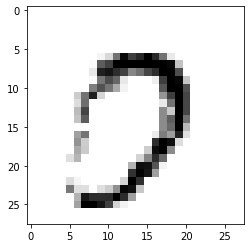

Predicted:  2
Real:  8


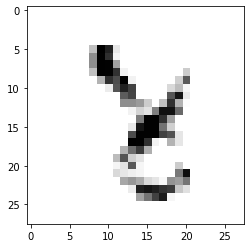

Predicted:  2
Real:  7


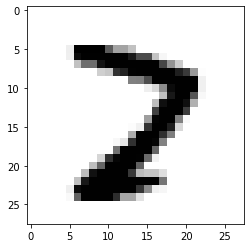

Predicted:  4
Real:  6


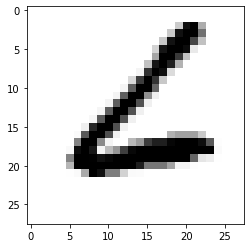

Predicted:  5
Real:  8


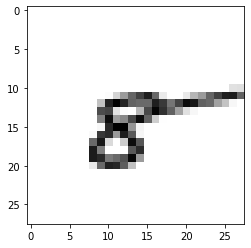

Predicted:  9
Real:  4


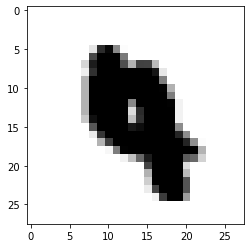

Predicted:  2
Real:  7


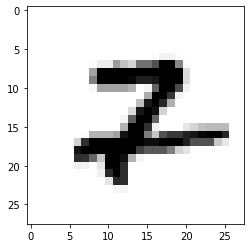

Predicted:  7
Real:  9


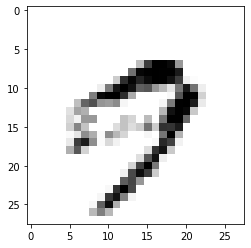

Predicted:  1
Real:  6


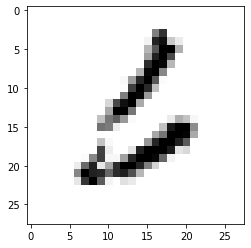

Predicted:  6
Real:  5


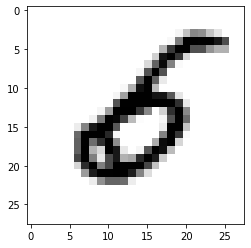

In [28]:
for i in ind:
    print('Predicted: ', y_pred[i])
    print('Real: ', np.argmax(test_y[i]))
    digit = test_X[i].reshape(28, 28)
    plt.imshow(digit, cmap=plt.cm.binary)
    plt.show()